In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
# DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
DIR_PATH = '..\\data\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')
data_cp = data.copy()
data_cp

,Etiquetas,Sector,Consigna,Long,Lat,C01-BANCOS,C05-CENTRALES CAMIONERAS,C06-CENTROS COMERCIALES,C09-CUARTELES DE LA POLICÍA AUXILIAR,C10-CUARTELES PBI,...,C78-ZONAS ARQUEOLOGICAS,C81-ESTACIONES DE CABLEBUS,C82-ALCALDIAS,C13-CAM,C13-CPARA EL TRABAJO,C13_PREESC,C13_PRIM,C13_SEC,C13_BACH,C13_SUP
0,10534,MORELOS,26,-99.136881,19.444434,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,2566,MORELOS,21,-99.132804,19.444939,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,6691,MORELOS,21,-99.136777,19.445221,1,0,0,0,0,...,0,0,0,0,0,1,3,0,0,0
3,2560,MORELOS,20,-99.132794,19.444180,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2232,MORELOS,18,-99.131108,19.449400,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,10128,ALAMEDA,1,-99.141230,19.428914,2,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
239,10132,ALAMEDA,1,-99.138377,19.433688,30,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
240,10135,ALAMEDA,1,-99.136385,19.432135,26,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
241,10136,ALAMEDA,1,-99.136158,19.434286,17,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],#'C46-ESTABLECIMIENTOS MERCANTILES',],

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', 'C26-PLAZAS Y PARQUES',],

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', 'C01-BANCOS'],

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],

['C44-GUARDERIAS', 'C67-CENTROS PILARES', 'C13-CAM', 'C13-CPARA EL TRABAJO', 'C13_PREESC', 'C13_PRIM', 'C13_SEC', 'C13_BACH', 'C13_SUP',],

['C33-IGLESIAS Y TEMPLOS',],

['C51-EDIFICIOS',],]

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['P.Interes-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

print(data.columns)
# Seleccionamos las columnas que nos interesan.
X = data.filter(regex='^P.Interes-\d+')
X

Index(['Etiquetas', 'Sector', 'Consigna', 'Long', 'Lat',
       'C46-ESTABLECIMIENTOS MERCANTILES', 'P.Interes-1', 'P.Interes-2',
       'P.Interes-3', 'P.Interes-4', 'P.Interes-5', 'P.Interes-6',
       'P.Interes-7', 'P.Interes-8', 'P.Interes-9', 'P.Interes-10'],
      dtype='object')


,P.Interes-1,P.Interes-2,P.Interes-3,P.Interes-4,P.Interes-5,P.Interes-6,P.Interes-7,P.Interes-8,P.Interes-9,P.Interes-10
0,0,5,1,4,2,0,1,2,0,0
1,0,1,0,0,1,1,0,2,0,0
2,0,2,1,5,2,1,1,4,0,0
3,0,4,1,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...
238,0,8,3,0,3,2,0,4,0,0
239,0,0,8,4,3,31,0,1,0,0
240,0,1,10,1,13,26,0,0,1,0
241,0,3,8,1,8,20,0,0,1,0


In [4]:
# Creamos una instancia del objeto PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=7), KMeans())#n_clusters=3))
pca_pipe.fit_transform(X)

# Obtenemos el modelo
pca = pca_pipe.named_steps['pca']
kmeans = pca_pipe.named_steps['kmeans']

labels = kmeans.labels_
# Print unique cluster labels
print(f'Records per cluster: {np.bincount(labels)} | Total records: {len(labels)}')
print(f'Cluster labels: {np.unique(labels)}')


# modelo_pca = pca_pipe.named_steps['pca']
# modelo_pca.components_

Records per cluster: [29 47 39  5 84  8  6 25] | Total records: 243
Cluster labels: [0 1 2 3 4 5 6 7]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

0 29
1 47
2 39
3 5
4 84
5 8


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


6 6
7 25
[0 1 2 3 4 5 6 7]


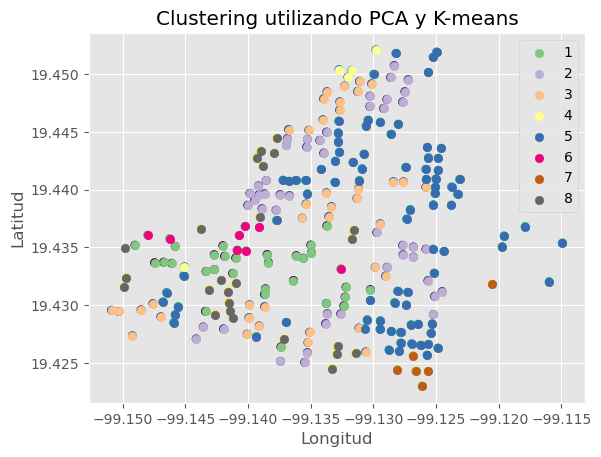

In [5]:
geo = plt.scatter(data_cp['Long'], data_cp['Lat'], c=labels, cmap='viridis')

colors = plt.get_cmap('Accent')(np.linspace(0,1,len(np.unique(labels))))


for label in np.unique(labels):
    data_ = data_cp[labels==label]
    print(label, len(data_))
    plt.scatter(data_['Long'], data_['Lat'], c=colors[label], label=label+1)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clustering utilizando PCA y K-means')
plt.legend()
print(np.unique(labels))

plt.show()

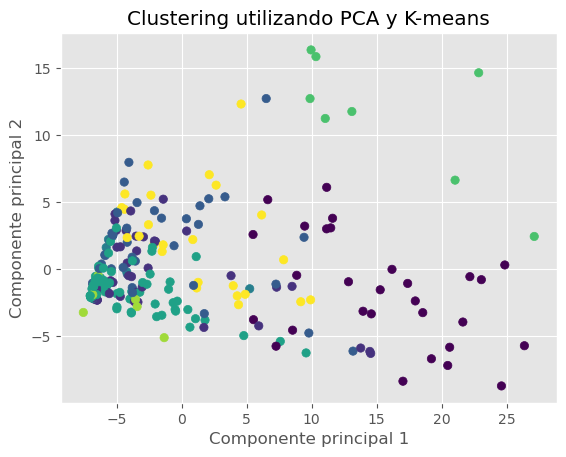

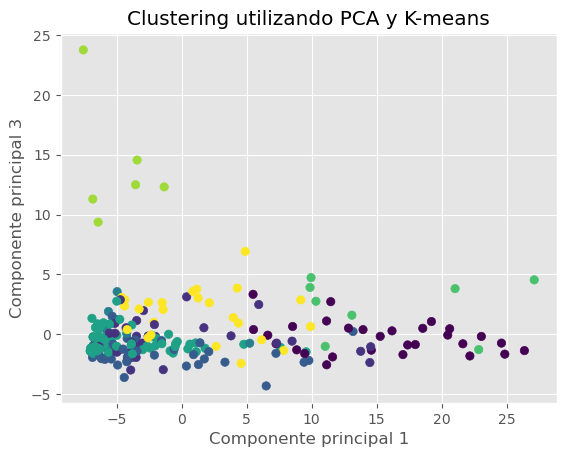

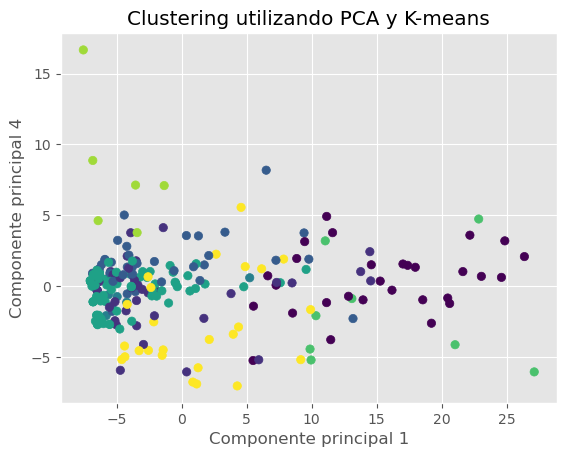

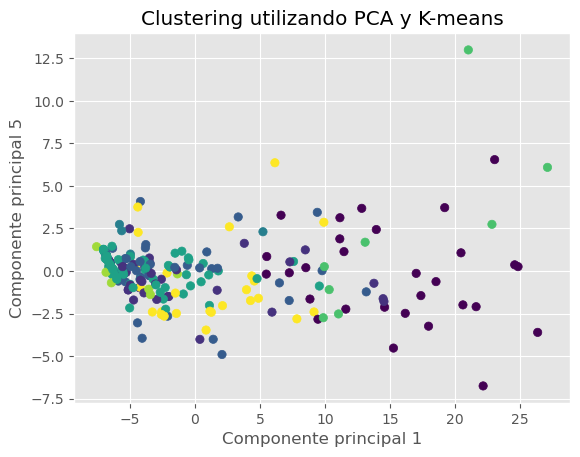

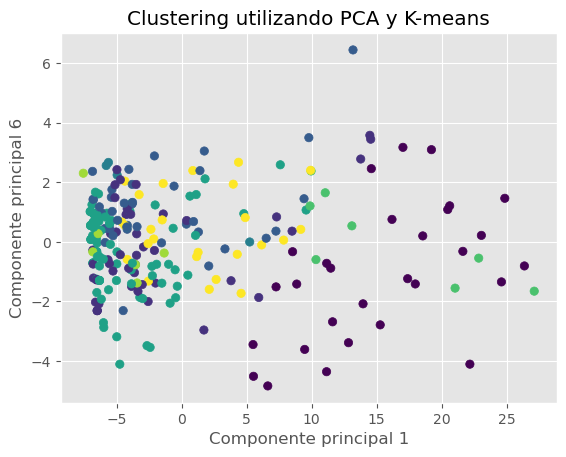

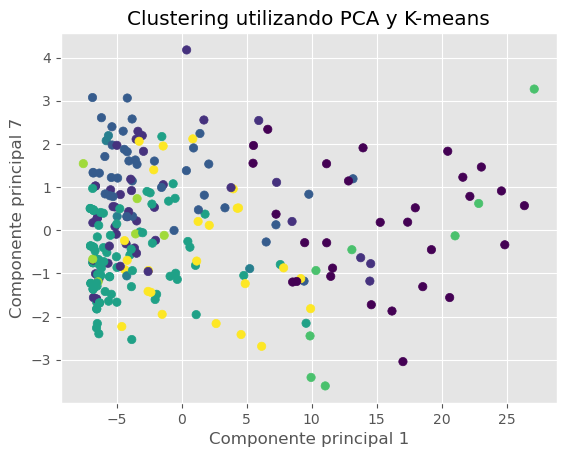

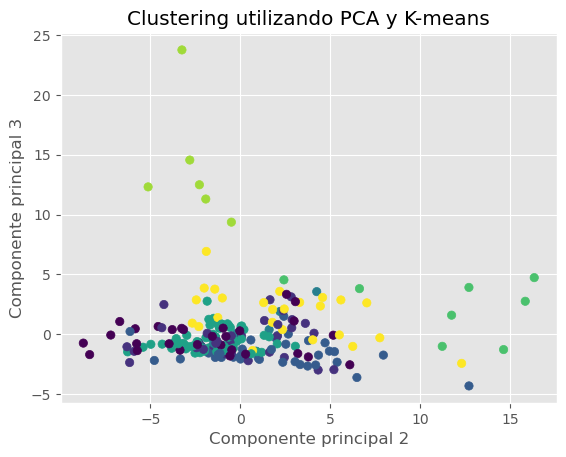

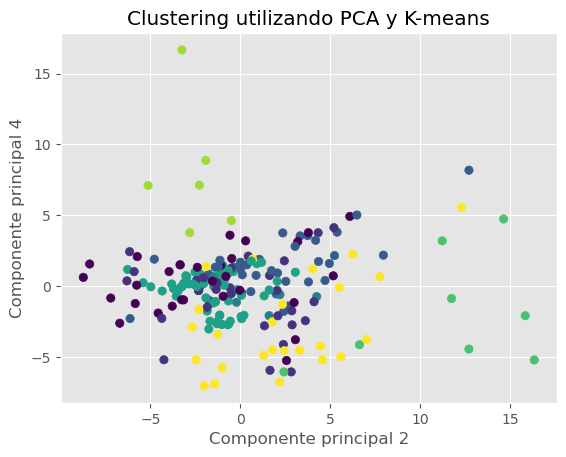

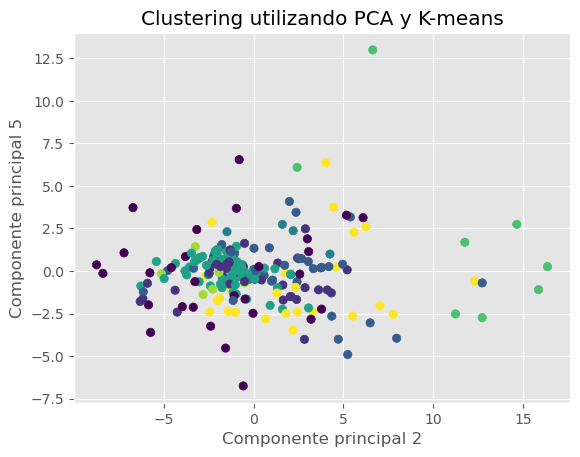

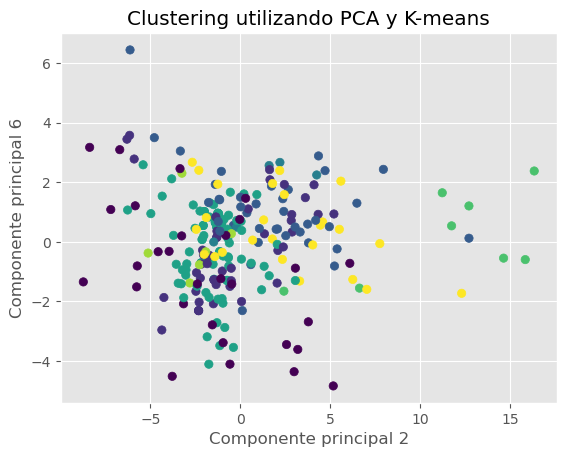

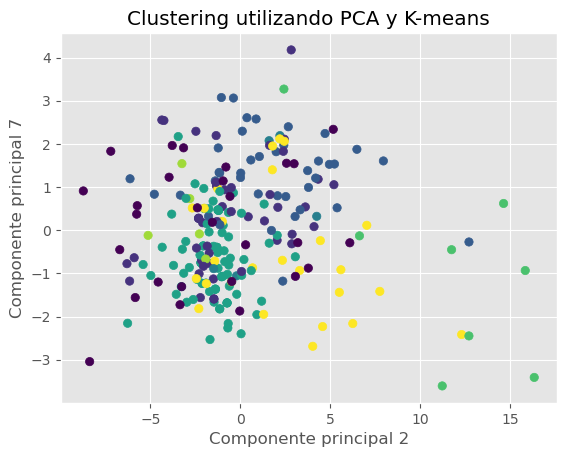

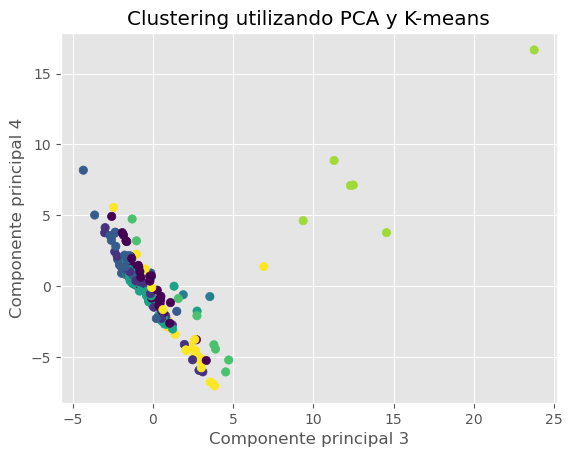

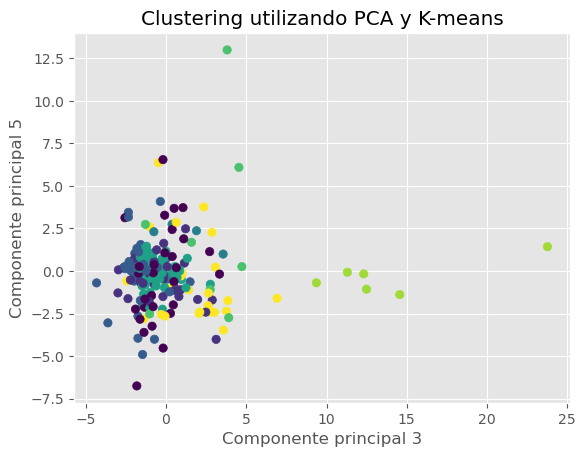

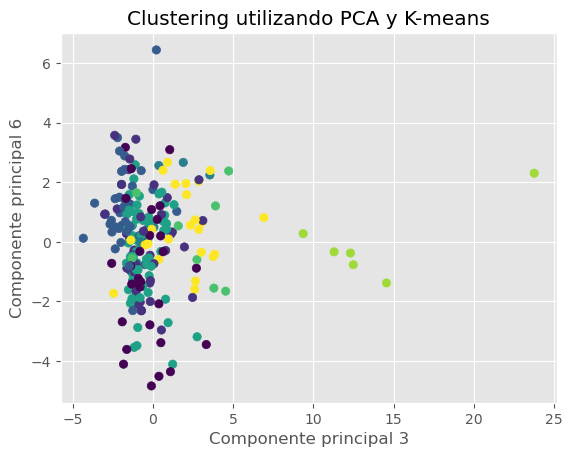

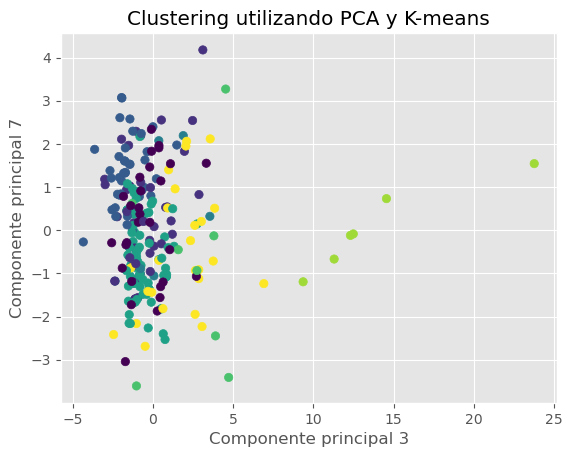

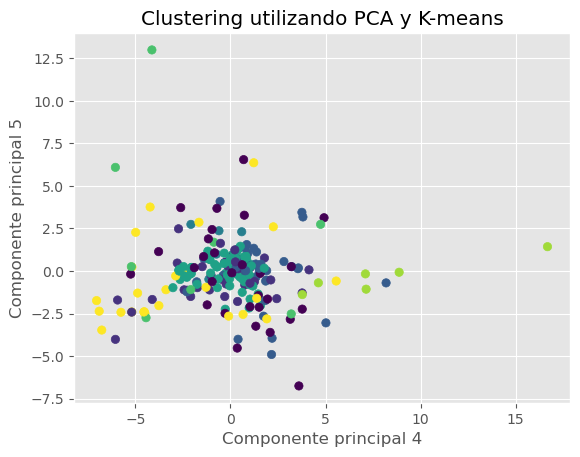

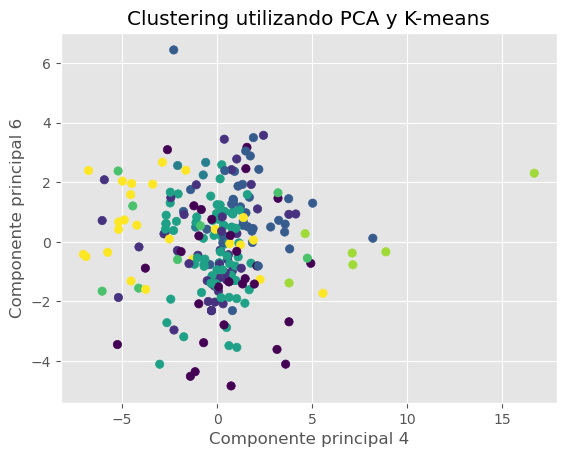

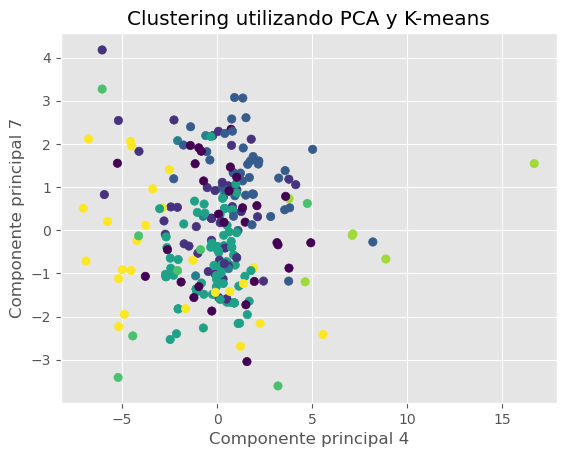

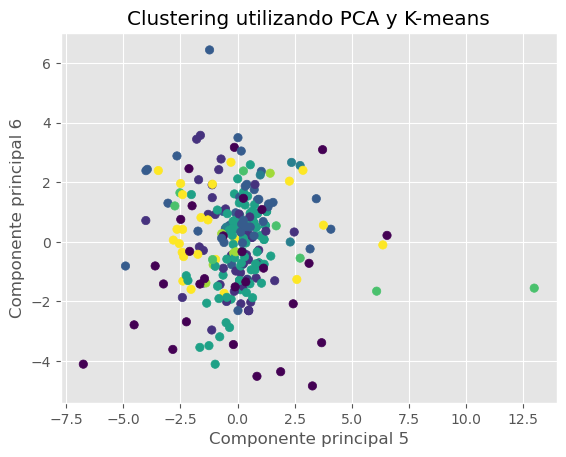

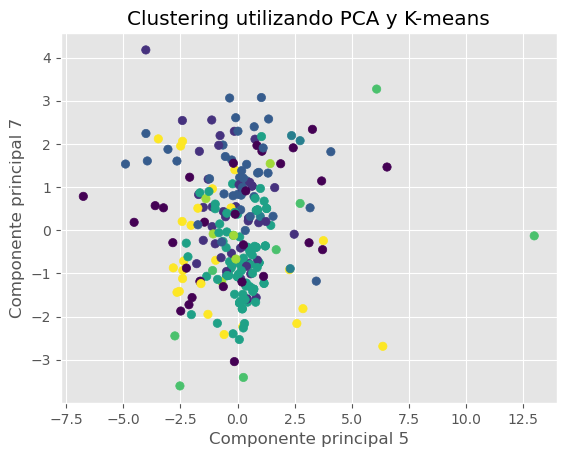

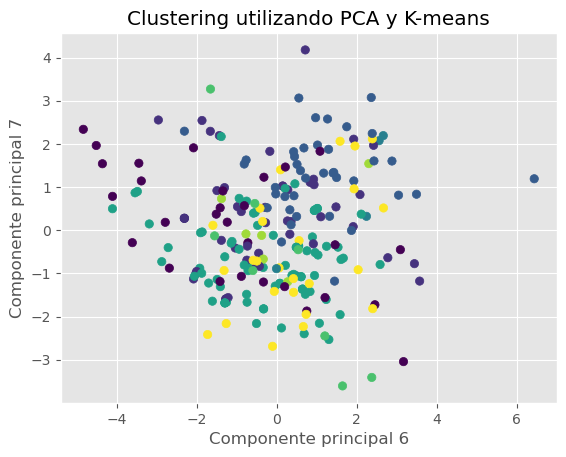

In [6]:
data_pca = pca.fit_transform(X)

# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
# plt.xlabel('Componente principal 1')
# plt.ylabel('Componente principal 2')
# plt.title('Clustering utilizando PCA y K-means')
# plt.show()

# Create for to show components dot graph each other
for i in range(len(pca.components_)):
	for j in range(i,len(pca.components_)):
		if i == j:
			continue
		plt.scatter(data_pca[:,i], data_pca[:,j], c=labels, cmap='viridis')
		plt.xlabel('Componente principal '+str(i+1))
		plt.ylabel('Componente principal '+str(j+1))
		plt.title('Clustering utilizando PCA y K-means')
		plt.show()


In [7]:
# Cuardar los datos agrupados en un archivo csv
data_cp['Cluster'] = labels
data['Cluster'] = labels
data_cp.to_csv(DIR_PATH + 'B200m_CONSIGNADAS_CLUSTER.csv', index=False)

In [8]:
# Create loop to get mean, variance and standard deviation of each cluster and store into a dataframe
drop_columns = ['Etiquetas', 'Consigna', 'Lat', 'Long', 'Sector']
data = data.drop(drop_columns, axis=1)
columns = [(op, column) for op in ['mean', 'var', 'std'] for column in data.columns]
# Drop any pair with (_, Cluster)
columns = [column for column in columns if column[1] != 'Cluster']
# create dataframe 
df = pd.DataFrame(columns=pd.MultiIndex.from_tuples(columns))
for i in range(len(np.unique(labels))):
	data_ = data[data['Cluster'] == i]

	# print(data_.columns)
	# Drop Cluster column
	data_ = data_.drop('Cluster', axis=1)

	mean = data_.mean(axis=0)
	var = data_.var(axis=0)
	std = data_.std(axis=0)

	


	values = np.concatenate((mean.values, var.values, std.values), axis=0)

	# Append values to df
	# df = df.append(pd.DataFrame(values, columns=headers), ignore_index=True)
	df.loc[i] = values


df.index.name = 'Cluster'
df.to_excel(DIR_PATH + 'B200m_CONSIGNADAS_CLUSTER.xlsx')
df

mean                                      \
        C46-ESTABLECIMIENTOS MERCANTILES P.Interes-1 P.Interes-2 P.Interes-3   
Cluster                                                                        
0                             931.482759    0.103448    2.379310    5.689655   
1                             712.553191    0.021277    1.872340    2.127660   
2                             564.025641    0.000000    1.179487    0.974359   
3                             217.600000    2.600000    3.600000    0.600000   
4                             641.202381    0.059524    1.154762    1.333333   
5                             406.000000    0.125000   10.000000    3.750000   
6                             667.833333    0.166667    1.833333    2.166667   
7                             955.760000    0.080000    6.320000    2.600000   

                                                                     \
        P.Interes-4 P.Interes-5 P.Interes-6 P.Interes-7 P.Interes-8   
Cluster                                                               
0          4.275862    6.068966   20.241379    0.068966    0.965517   
1          0.680851    2.319149    3.659574    1.127660    2.042553   
2          1.538462    5.076923    3.769231    0.102564    3.846154   
3          2.600000    2.400000    2.600000    0.000000    3.000000   
4          0.130952    1.178571    2.083333    0.011905    1.190476   
5         12.000000   13.750000   16.375000    0.000000    1.250000   
6          0.166667    1.166667    2.000000    0.166667    0.333333   
7          2.440000    4.280000    6.080000    0.000000    1.320000   

                     ...         std                                      \
        P.Interes-9  ... P.Interes-1 P.Interes-2 P.Interes-3 P.Interes-4   
Cluster              ...                                                   
0          0.931034  ...    0.309934    2.042649    2.156443    2.926438   
1          0.829787  ...    0.145865    2.601145    1.739778    1.162949   
2          0.435897  ...    0.000000    1.668150    1.111831    1.997975   
3          0.200000  ...    0.547723    1.816590    0.894427    1.516575   
4          0.321429  ...    0.238024    1.418416    1.433954    0.373191   
5          1.000000  ...    0.353553    3.817254    3.011881    4.869732   
6          0.000000  ...    0.408248    1.940790    1.834848    0.408248   
7          0.440000  ...    0.276887    2.657066    1.732051    2.724579   

                                                                     \
        P.Interes-5 P.Interes-6 P.Interes-7 P.Interes-8 P.Interes-9   
Cluster                                                               
0          3.644282    6.732942    0.257881    0.944259    0.923156   
1          2.086253    5.835709    0.337318    1.318059    0.892460   
2          3.779339    5.116853    0.307355    0.932977    0.552262   
3          1.140175    4.774935    0.000000    2.000000    0.447214   
4          1.449227    3.433388    0.109109    0.987588    0.469830   
5          5.284749    7.069805    0.000000    1.281740    0.925820   
6          0.983192    2.449490    0.408248    0.816497    0.000000   
7          3.857028    4.803818    0.000000    1.405940    0.650641   

                      
        P.Interes-10  
Cluster               
0           0.000000  
1           0.000000  
2           0.223456  
3           1.414214  
4           0.323802  
5           0.000000  
6           6.645801  
7           1.400000  

[8 rows x 33 columns]

In [9]:
pca_df = pd.DataFrame(
    data    = pca.components_,
    columns = X.columns,
    index   = [f'PC{x+1}' for x in range(len(pca.components_))]
)
pca_df

,P.Interes-1,P.Interes-2,P.Interes-3,P.Interes-4,P.Interes-5,P.Interes-6,P.Interes-7,P.Interes-8,P.Interes-9,P.Interes-10
PC1,0.000555,0.089448,0.166234,0.224263,0.240104,0.924319,-0.006164,-0.021620,0.019904,-0.033957
PC2,0.001452,0.368376,-0.062858,0.414182,0.756862,-0.323603,-0.005728,0.062861,0.032821,-0.078598
PC3,0.024239,0.467906,0.154515,0.093559,-0.177338,-0.021328,-0.012147,-0.120548,-0.025034,0.837042
PC4,-0.000770,-0.707899,-0.203266,-0.040585,0.413172,0.027657,-0.002550,0.037299,0.014716,0.531812
PC5,0.042830,-0.225585,-0.218597,0.856136,-0.398083,-0.041207,-0.017329,0.056343,-0.052816,-0.009585
PC6,0.032073,0.283797,-0.789846,-0.178115,-0.058145,0.186488,-0.019211,0.468794,-0.016984,0.065301
PC7,0.023686,-0.067332,0.477817,0.029880,-0.031805,-0.055031,0.073571,0.867240,-0.014192,0.062809


In [10]:
# Obtencion de los residuales del pca
residuales = pca_pipe.named_steps['standardscaler'].transform(X)
# Guardar en un excel
residuales = pd.DataFrame(residuales)
residuales.to_excel(DIR_PATH + 'residuales.xlsx')

In [11]:
pca_df.sum(axis=1)

PC1    1.603088
PC2    1.165767
PC3    1.220865
PC4    0.069586
PC5   -0.007894
PC6   -0.025848
PC7    1.366643
dtype: float64

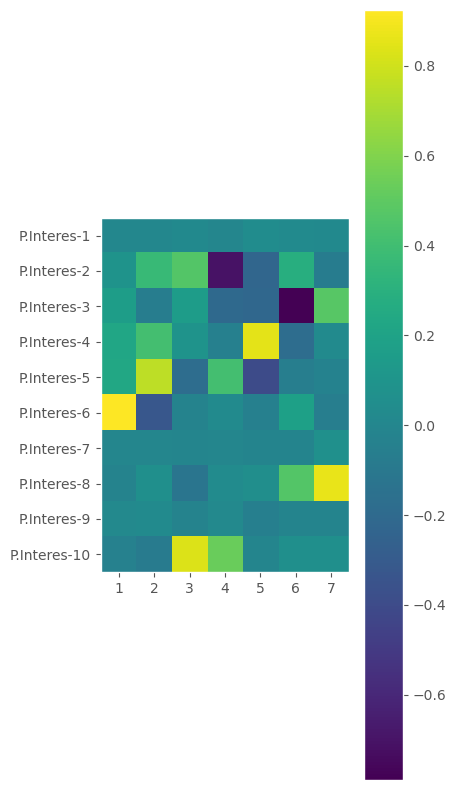

In [12]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
fig.set_figheight(10)
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='equal')
plt.yticks(range(len(X.columns)), X.columns, )# fontsize=1)
plt.xticks(range(len(pca.components_)), np.arange(pca.n_components_) + 1, )# fontsize=3)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.63050246 0.13978145 0.07554515 0.06901728 0.03425677 0.02567727
 0.01731983]


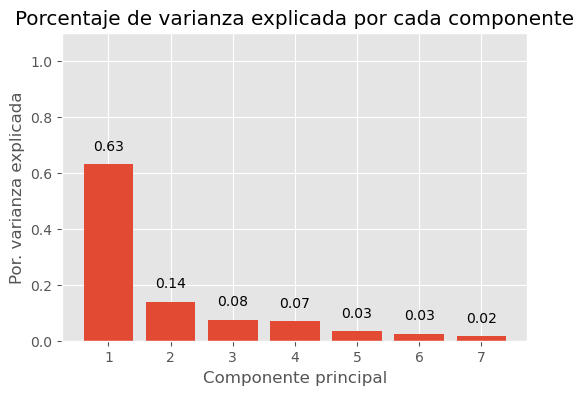

In [13]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

2
3
4
5
6


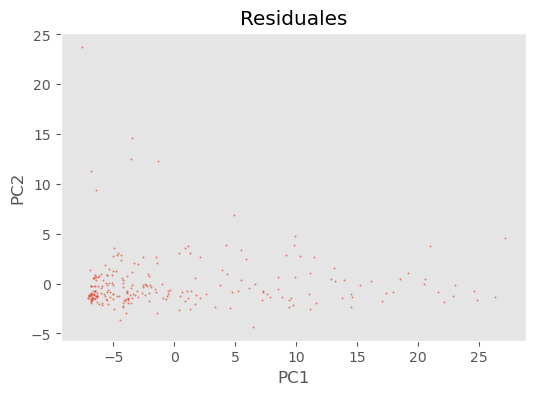

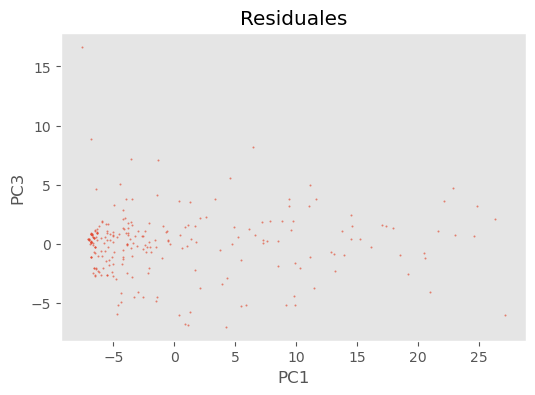

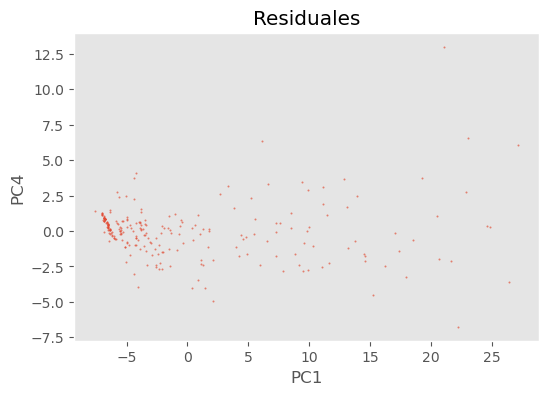

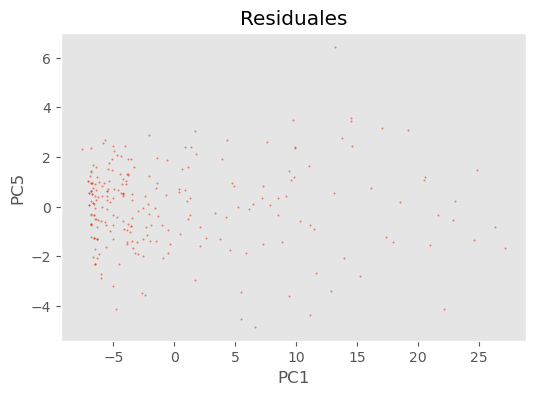

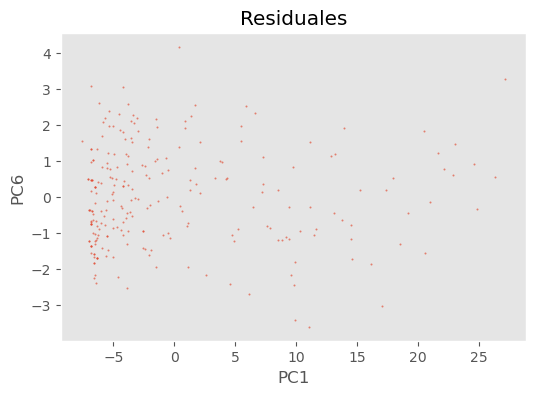

In [14]:
# Realizar la grafica de dispercion de los componentes principales
# ==============================================================================

for i in range(2,len(pca.components_)):
    
	fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
	ax.scatter(
		x = pca.transform(X)[:, 0],
		y = pca.transform(X)[:, i],
		s = 1,
		alpha = 0.5
	)
	ax.set_title('Residuales')
	ax.set_xlabel('PC1')
	ax.set_ylabel(f'PC{i}')
	ax.grid();
	fig.show()
	print(i)



------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.63050246 0.77028391 0.84582906 0.91484634 0.94910311 0.97478038
 0.99210021]


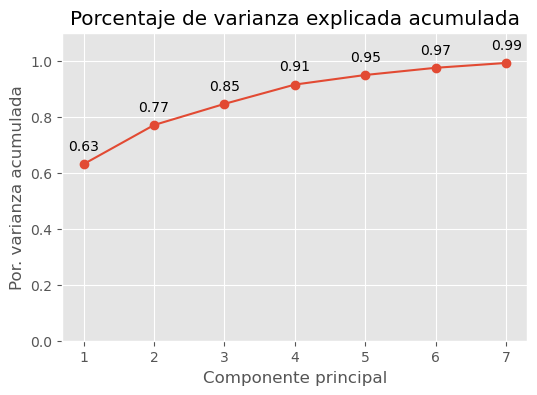

In [15]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [16]:
# Realizar el clustering con los componentes principales
# ==============================================================================
# Seleccionamos el número de componentes que vamos a utilizar
# ------------------------------------------------------------------------------
n_componentes = 3

# Creamos una instancia del objeto PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=n_componentes))

# Ajustamos el modelo
pca_pipe.fit(X)

# Obtenemos los datos transformados
pca_datos = pca_pipe.transform(X)

# Creamos un dataframe con los datos transformados
pca_df = pd.DataFrame(
    data    = pca_datos,
	columns = [f'PC{x+1}' for x in range(n_componentes)]
	
)

# Creamos un dataframe con los datos transformados y la variable objetivo
pca_df = pd.concat([pca_df, y], axis=1)
pca_df.head()

# Grafico de dispercion de los componentes principales
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(
    x = pca_df['PC1'],
    y = pca_df['PC2'],
    s = 1,
    alpha = 0.5
)
ax.set_title('Residuales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.grid();


TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

# Ayuda


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')

In [ ]:

# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C46-ESTABLECIMIENTOS MERCANTILES','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', ],#'C26-PARQUES Y RECREACION',],

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', ],#'C01-BANCOS Y CAJEROS'],

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],

['C44-GUARDERIAS', 'C67-CENTROS PILARES', ],#'C13-EDUCACIÓN',],

['C33-IGLESIAS Y TEMPLOS',],

['C51-EDIFICIOS',],]

In [ ]:

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['GRUPO-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

	
data = data.filter(regex='^GRUPO-\d+')

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data_normalized)

# Aplicar K-means
k = 3
kmeans = KMeans()#(n_clusters=k)
kmeans.fit(data_pca)

# Asignar etiquetas de cluster y visualizar
labels = kmeans.labels_
labels

In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


In [ ]:
len(kmeans.labels_)
# Separar los datos en grupos
data['CLUSTER'] = kmeans.labels_
data.groupby('CLUSTER').size()